## Support vector machine (Метод опорных векторов)

Классификация

In [272]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np

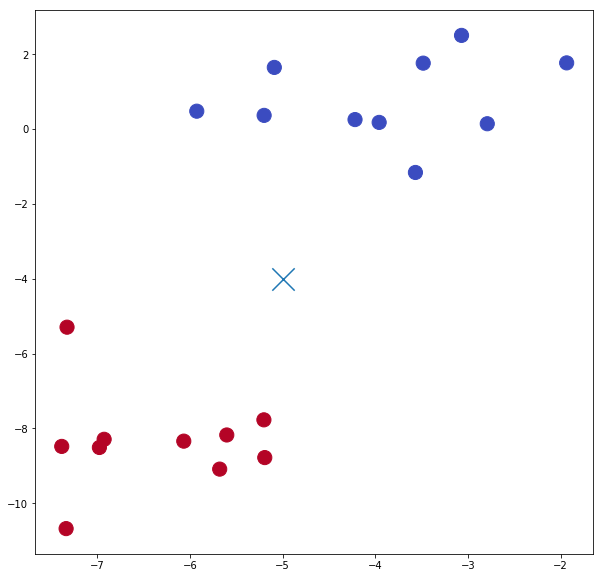

In [10]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2 ,cluster_std=1, random_state=17)
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
plt.scatter(-5, -4, s=500, marker='x')

SVM похож на линейный классификатор. Классификатор просто находит скалярное произведение векторов: положительное скалярное произведение векторов соответветствует одному классу объектов, отрицательное скалярное произведение соответсвует другому классу объектов.

$a(x) = sign(\langle \omega, x \rangle - \omega_0)$

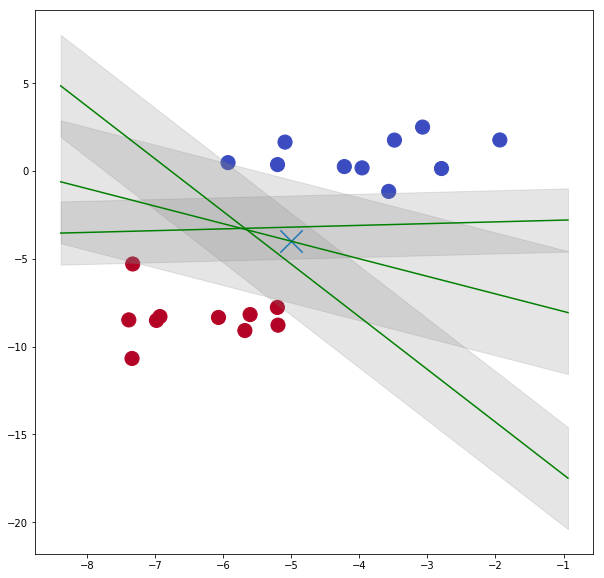

In [12]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2 ,cluster_std=1, random_state=17)
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
x_line = np.linspace(x[:,0].min() - 1, x[:,0].max() + 1, 100)
y1 = - x_line - 9 
y2 = -  3*x_line - 20.3
y3 =  x_line / 10 - 2.7
plt.plot(x_line, y1, 'g')
plt.plot(x_line, y2, 'g')
plt.plot(x_line, y3, 'g')
d1 = 3.5
plt.fill_between(x_line, y1 - d1, y1 + d1,
                 color='gray', alpha=0.2)

d2 = 2.9
plt.fill_between(x_line, y2 - d2, y2 + d2,
                 color='gray', alpha=0.2)

d3 = 1.8
plt.fill_between(x_line, y3 - d3, y3 + d3,
                 color='gray', alpha=0.2)
plt.scatter(-5, -4, s=500, marker='x')

Из рисунка видно, что разделяющая плоскость (в нашем случае прямая) может быть проведена не единственным образом. В этом случае возникает задача отыскания оптимальной разделяющей гиперплоскости.
Пусть существует и задается уравнением некоторая разделяющая гиперплоскость $\langle \omega, x \rangle - \omega_0 = 0$. Для нее можно взять две параллельные гиперплоскости так, чтобы между ними не было объектов выборки, а расстояние между ними было максимальным. В таком случае каждая из двух получившихся граничных плоскостей будет соприкасаться с объектами соответсвующих классов.

Следует отметить, что построенные дополнительные гиперплоскости, примыкающие к объектам разных классов будут описываться следующими уравнениями.

\begin{equation}
\langle \omega, x \rangle - \omega_0 = -1
\end{equation}

\begin{equation}
\langle \omega, x \rangle - \omega_0 = +1
\end{equation}

Также необходимо отметить, что у нас будет как минимум один объект на дополнительных гиперплоскостях, следовательно для них выполняются равенства выше.
Отсюда можно вычислить расстояние разделяющей полосы.

Расстояние разделяющей полосы - это скалярное произведение вектора разницы двух объектов, лежащих на дополнительных гиперплоскостях, и нормализованного вектора нормали разделяющей гиперплоскости.

\begin{equation}
\langle (x_+ - x_-), \frac{\omega}{||\omega||} \rangle = \frac{\langle w , x_+ \rangle - \langle w , x_+ \rangle}{||\omega||} = \frac{(w_0 + 1) - (w_0 - 1)}{||\omega||}
\end{equation}

В нашей задаче попытаемся сделать масимальную ширину полосы. Из уравнения выше видно, что максимальная полоса будет при минимальной норме вектора $\omega$

Имеем следующую систему уравнений:
\begin{equation}
\begin{cases}
   \langle \omega, \omega \rangle \rightarrow min; 
   \\
   y_i(\langle \omega, x_i \rangle - \omega_0) \geq 1,     i = 1,...,l.
 \end{cases}
\end{equation}

По теореме Куна-Таккера эта задача эквивалента двойственной задаче поиска седловой точки функции Лагранжа:

\begin{equation}
\begin{cases}
   L(\omega, \omega_0; \lambda)= \frac{1}{2} \langle \omega, \omega \rangle - \sum\limits_{i=1}^l \lambda_i(\langle \omega, x_i \rangle -\omega_0) - 1) \rightarrow \min\limits_{\omega, \omega_0} \max\limits_{\lambda}; 
   \\
   \lambda_i \geq 0,     i = 1,...,l;
   \\
   \lambda_i = 0, либо \langle \omega, x_i \rangle - \omega_0 = y_i, i = 1,...,l.
 \end{cases}
\end{equation}

Необходимым условием седловой точки является равенство нулю производных Лагранжиана. Отсюда немедленно вытекают два полезных соотношения:

\begin{equation}
\frac{\partial L}{\partial \omega} = \omega - \sum\limits_{i=1}^l \lambda_i y_i x_i = 0 => \omega = \sum\limits_{i=1}^l \lambda_i y_i x_i
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \omega_0} = - \sum\limits_{i=1}^l \lambda_i y_i = 0 => \sum\limits_{i=1}^l \lambda_i y_i = 0
\end{equation}

Если $\lambda_i > 0$ и $\langle \omega, x_i \rangle - \omega_0 = y_i$

\begin{equation}
\begin{cases}
   -L(\lambda)= - \sum\limits_{i=1}^l \lambda_i + \frac{1}{2}\sum\limits_{i=1}^l\sum\limits_{j=1}^l \lambda_i \lambda_j y_i y_j (\langle x_i, x_j \rangle) \rightarrow \min\limits_{\lambda}; 
   \\
   \lambda_i \geq 0,     i = 1,...,l;
   \\
   \sum\limits_{j=1}^l\lambda_i y_i = 0.
 \end{cases}
\end{equation}

In [26]:
clf = SVC(kernel='linear')
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

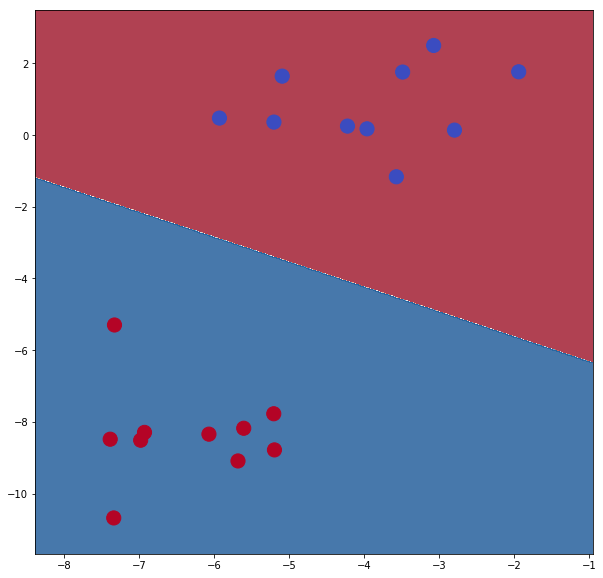

In [27]:
h = .02
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)

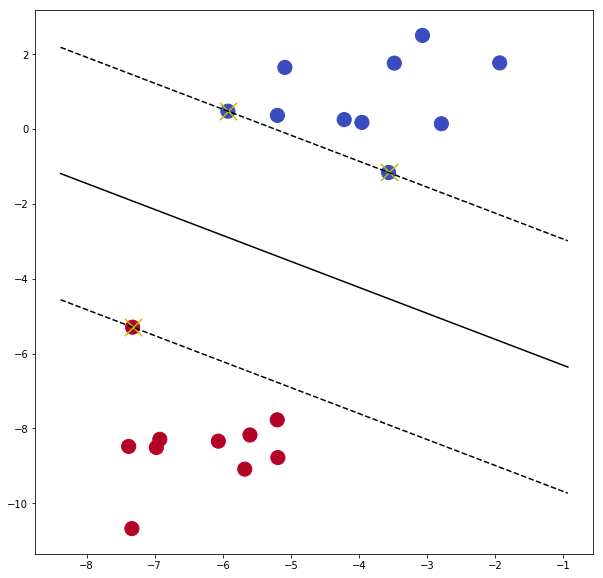

In [40]:
plt.figure(figsize=(10,10))
# plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=300, c='y', marker='x')
# Построение разделяющей гиперплоскости
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(x[:,0]) - 1, np.max(x[:,0]) + 1)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k')
b = clf.support_vectors_[0]
yy_1 = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_2 = a * xx + (b[1] - a * b[0])
plt.plot(xx, yy_1, '--k')
plt.plot(xx, yy_2, '--k')

# Линейно неразделимая выборка

Чтобы обобщить SVM на случай линейной неразделимости, позволим алгоритму допускать ошибки на обучающих объектах, но при этом постараемся, чтобы ошибок было поменьше. Введём набор дополнительных переменных $\xi_i > 0$, характеризующих величину ошибки на объектах $x_i$, i = 1,... ,l. Введём в минимизируемый функционал штраф за суммарную ошибку:

\begin{equation}
\begin{cases}
   \frac{1}{2}\langle \omega, \omega \rangle + C \sum\limits_{i=1}^{l} \xi_i \rightarrow \min \limits_{\omega, \omega_0, \xi}
   \\
   y_i(\langle \omega, x_i \rangle - \omega_0 \geq 1 - \xi_i,     i = 1,...,l;
   \\
   \xi_i \geq 0 ,     i = 1,...,l.
 \end{cases}
\end{equation}

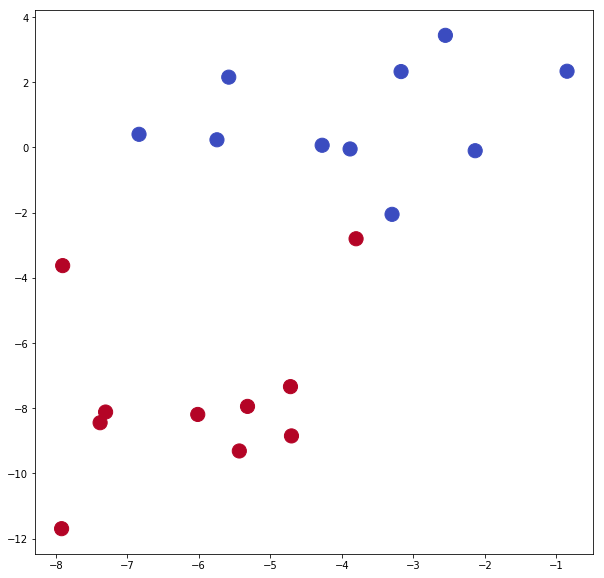

In [148]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2 ,cluster_std=1.5, random_state=17)
x[7] = [-3.8, -2.8]
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s = 200, c = y, cmap=cmap)

In [172]:
clf1 = SVC(C = 10, kernel='linear')
clf1.fit(x,y)
clf2 = SVC(C = 1, kernel='linear')
clf2.fit(x,y)
clf3 = SVC(C = 0.3, kernel='linear')
clf3.fit(x,y)
clf4 = SVC(C = 1e-3, kernel='linear')
clf4.fit(x,y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

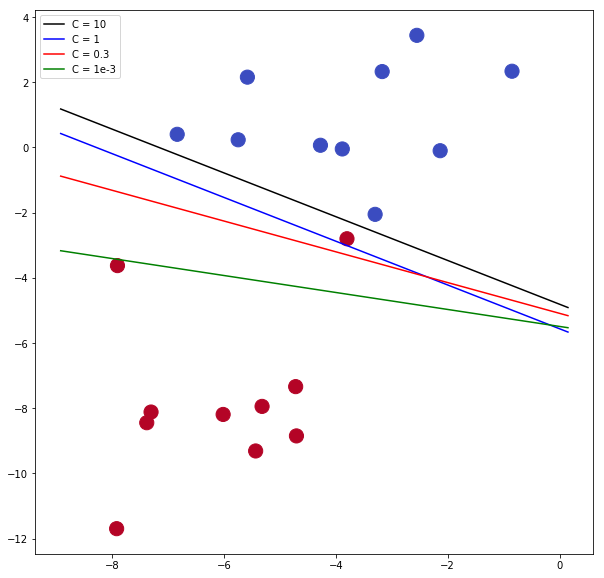

In [174]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
# Построение разделяющей гиперплоскости
w = clf1.coef_[0]
a = - w[0] / w[1]
xx = np.linspace(np.min(x[:,0]) - 1, np.max(x[:,0]) + 1)
yy = a * xx - (clf1.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k', label = 'C = 10')
w = clf2.coef_[0]
a = - w[0] / w[1]
xx = np.linspace(np.min(x[:,0]) - 1, np.max(x[:,0]) + 1)
yy = a * xx - (clf2.intercept_[0]) / w[1]
plt.plot(xx, yy, 'b', label = 'C = 1')
w = clf3.coef_[0]
a = - w[0] / w[1]
xx = np.linspace(np.min(x[:,0]) - 1, np.max(x[:,0]) + 1)
yy = a * xx - (clf3.intercept_[0]) / w[1]
plt.plot(xx, yy, 'r', label = 'C = 0.3')
w = clf4.coef_[0]
a = - w[0] / w[1]
xx = np.linspace(np.min(x[:,0]) - 1, np.max(x[:,0]) + 1)
yy = a * xx - (clf4.intercept_[0]) / w[1]
plt.plot(xx, yy, 'g', label = 'C = 1e-3')
plt.legend()

Большое значение параметра $C$ приводит к тому, что любая ошибка вносит большой вклад в функцию потерь. Меньшее значение параметра $C$ позволяет строить мягкий линию отступа и иметь некоторое количество ошибок в решении.

# Мультиклассовая классификация

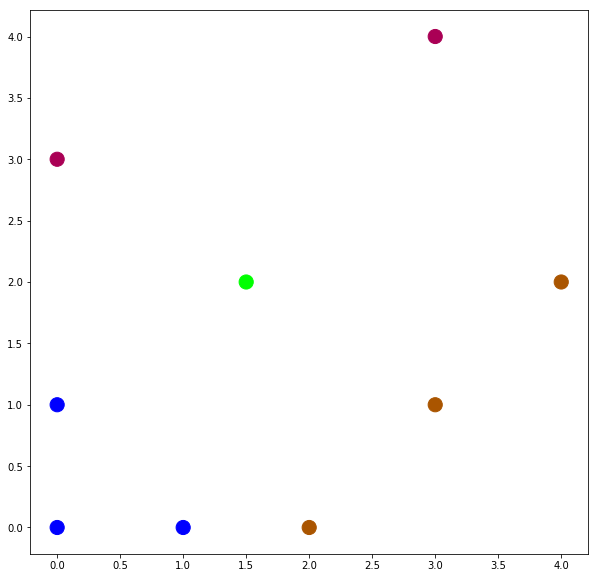

In [265]:
x = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [0, 3],
              [3, 4],
              [2, 0],
              [3, 1],
              [4, 2],
             [1.5, 2]])
y = np.array([0, 0, 0, 1, 1, 2, 2, 2, 3])
# , y = make_blobs(n_samples=1000, n_features=2, centers=5 ,cluster_std=3, random_state=14)
# x = np.delete(x, np.where(y == 1)[0][:300], axis = 0)
# y = np.delete(y, np.where(y == 1)[0][:300])
# x = np.delete(x, np.where(y == 2)[0][:200], axis = 0)
# y = np.delete(y, np.where(y == 2)[0][:200])
cmap = plt.cm.brg
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s = 200, c = y, cmap=cmap)

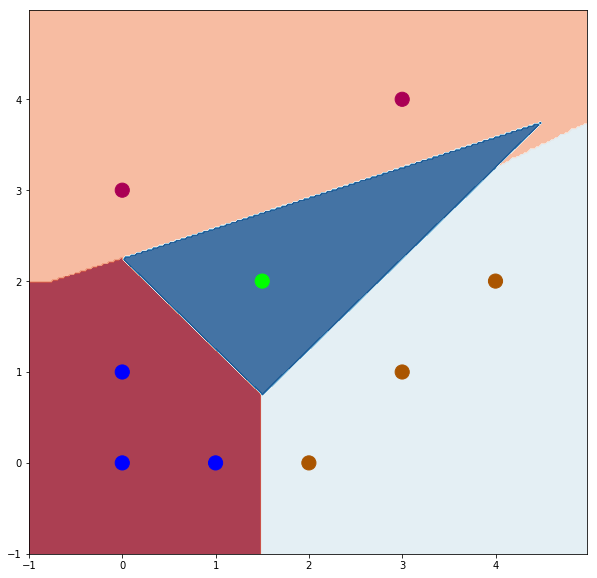

In [271]:
clf = SVC(C = 1, kernel = 'linear')
clf.fit(x,y)
h = .02
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)

# Ядерные методы

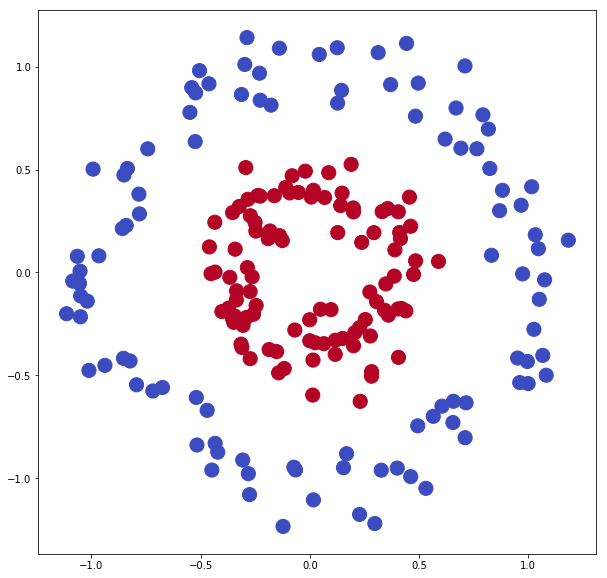

In [300]:
x, y = make_circles(n_samples=200, noise=0.1, factor=0.4, random_state=17)
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s = 200, c = y, cmap=cmap)

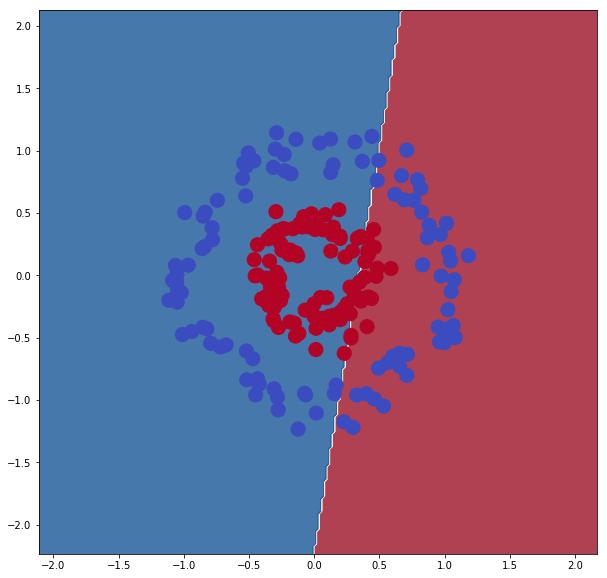

In [301]:
clf = SVC(C = 1, kernel = 'linear')
clf.fit(x,y)
h = .02
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)

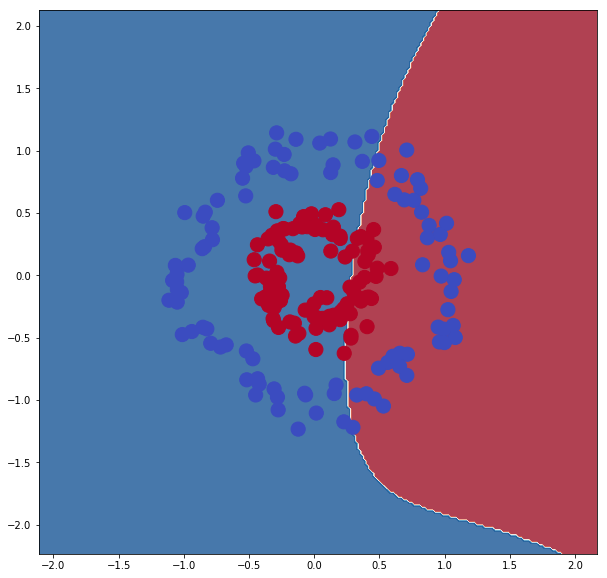

In [315]:
clf = SVC(C = 1, kernel = 'sigmoid')
clf.fit(x,y)
h = .02
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)

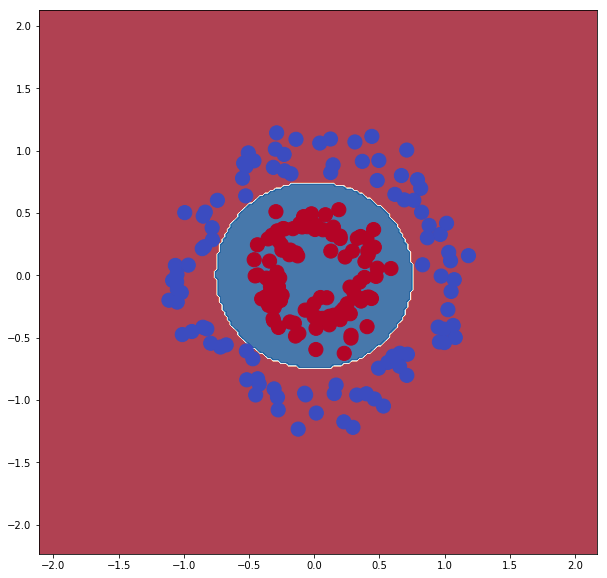

In [318]:
clf = SVC(C = 1, kernel = 'poly', degree=2)
clf.fit(x,y)
h = .02
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)

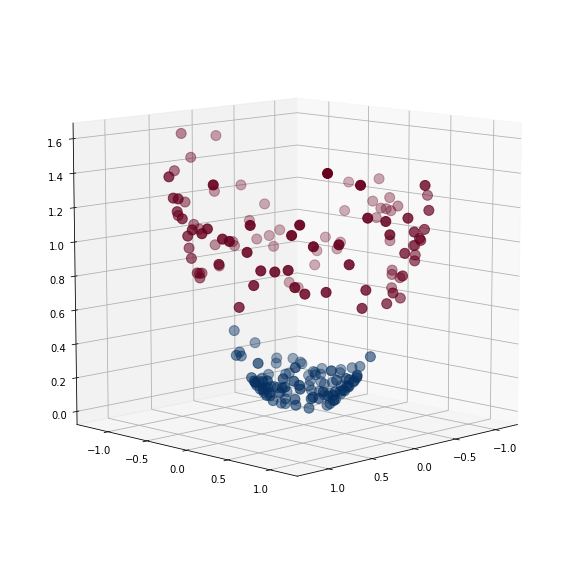

In [319]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d') # get current axis

z = np.array([np.dot(i, i) for i in x])
# X = np.arange(-2., 2., 0.1)
# Y = np.arange(-2., 2., 0.1)
# X, Y = np.meshgrid(X, Y)
# squaredErrorVect = np.vectorize(squarErr)
# Z = np.array( squaredErrorVect(X.ravel(), Y.ravel()) )
# Z.shape = X.shape

surf = ax.scatter(x[:,0], x[:,1], z, c = y, s = 100, cmap=plt.cm.RdBu)
# ax.set_xlabel('Intercept')
# ax.set_ylabel('Slope')
# ax.set_zlabel('Error')
ax.view_init(elev=10., azim=45)
plt.show()

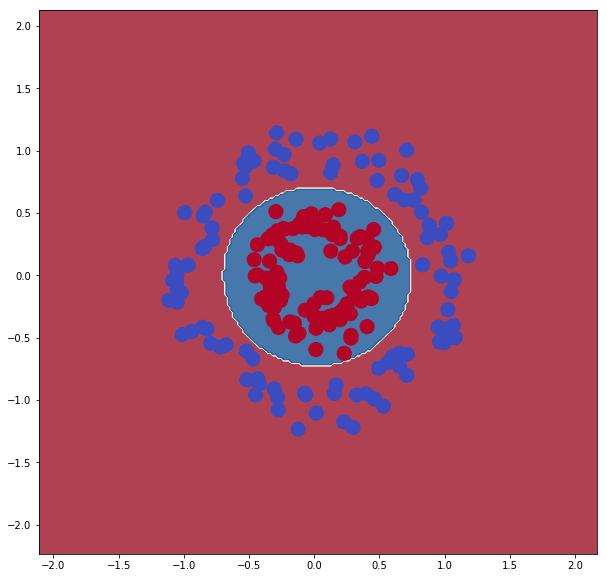

In [320]:
clf = SVC(C = 1, kernel = 'rbf')
clf.fit(x,y)
h = .02
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)